<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Machine_Learning_%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

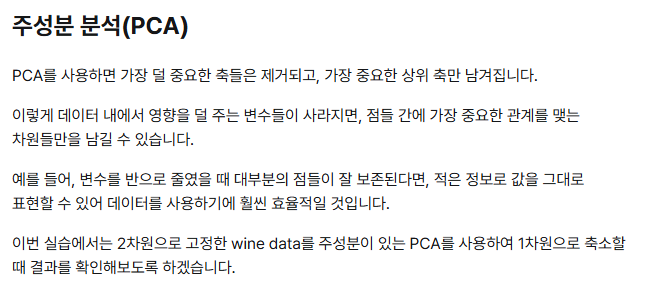

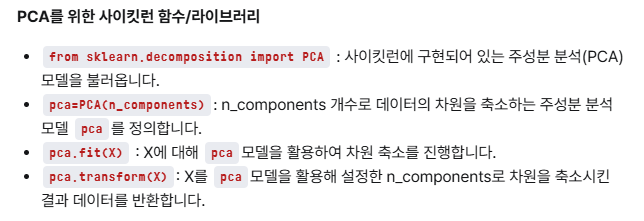

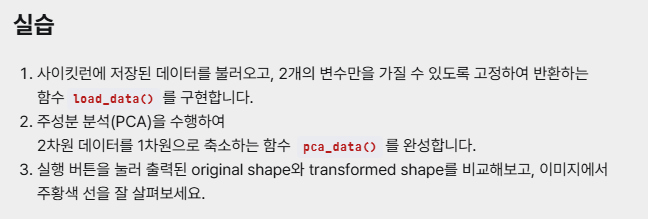

In [ ]:
from elice_utils import EliceUtils
elice_utils = EliceUtils()

import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

"""
1. 사이킷런에 저장된 데이터를 불러오고,
   2개의 변수만을 가질 수 있도록
   고정하여 반환하는 함수를 구현합니다.

   Step01. load_wine()을 활용해 사이킷런에 저장된 와인 데이터를 불러옵니다.
           데이터는 (X, y) 형태로 불러와야 합니다. (return_X_y를 True로 지정해야 합니다)

   Step02. column_start로 지정된 특정 column으로부터
           연속되는 2개의 변수를 X에 저장합니다.

"""
def load_data():

    X, y = load_wine(return_X_y=True)
    print(X.shape) #(178, 13) 178은 행의개수 13은 변수개수-13차원

    column_start = 6
    X = X[:, column_start : column_start+2] # 모든 행 가져오고, 변수는 연속되는 2가지 변수만 가져옴
    print(X.shape) #(178, 2) 13->2 개의 차원(변수)으로 감소
    return X

"""
2. 주성분 분석(PCA)을 수행하여
   2차원 데이터를 1차원으로 축소하는 함수를 완성합니다.

   Step01. PCA의 n_components를 1로 지정하여
           pca 를 정의합니다.

   Step02. 주성분 분석을 수행합니다.

   Step03. X_pca 값을 추출합니다.
"""
def pca_data(X):

    pca = PCA(n_components=1)

    pca.fit(X)

    X_pca = pca.transform(X)

    return pca, X_pca

# 축소된 주성분 축과 데이터 산점도를 그려주는 함수입니다.
def visualize(pca, X, X_pca):
    X_new = pca.inverse_transform(X_pca)

    plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
    plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
    plt.axis('equal');

    plt.savefig('PCA.png')
    elice_utils.send_image('PCA.png')

def main():

    X = load_data()

    pca, X_pca = pca_data(X)

    print("- original shape:   ", X.shape)
    print("- transformed shape:", X_pca.shape)

    visualize(pca, X, X_pca)

if __name__ == '__main__':
    main()

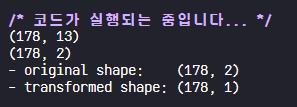

PCA로 1차원으로 차원 축소함

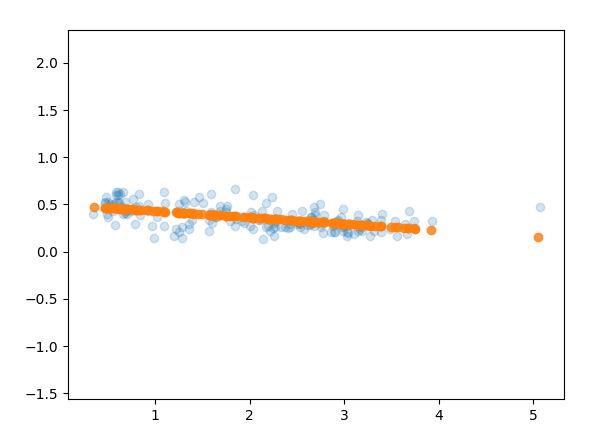

파란색이 오리지널, 주황색이 축소한 데이터